# Multi-LLM Chat Interface

This project provides a simple web interface for interacting with multiple large language models (LLMs) using Gradio. Users can choose between GPT-3.5 turbo, Claude, and Gemini to engage in conversations.

## Features

- Chat with three different LLMs: OpenAI's GPT-3, Anthropic's Claude, and Google's Gemini
- User-friendly interface built with Gradio
- Streaming responses for a more interactive experience

## Prerequisites

Before running this application, you need to have Python installed on your system. You'll also need API keys for the following services:

- OpenAI
- Anthropic
- Google AI


## Set up your API keys in the code:

Replace the placeholder API keys in the code with your actual API keys:

```

openai_api_key = "your_openai_api_key"

anthropic_api_key = "your_anthropic_api_key"

google_api_key = "your_google_api_key"

> Add blockquote


```
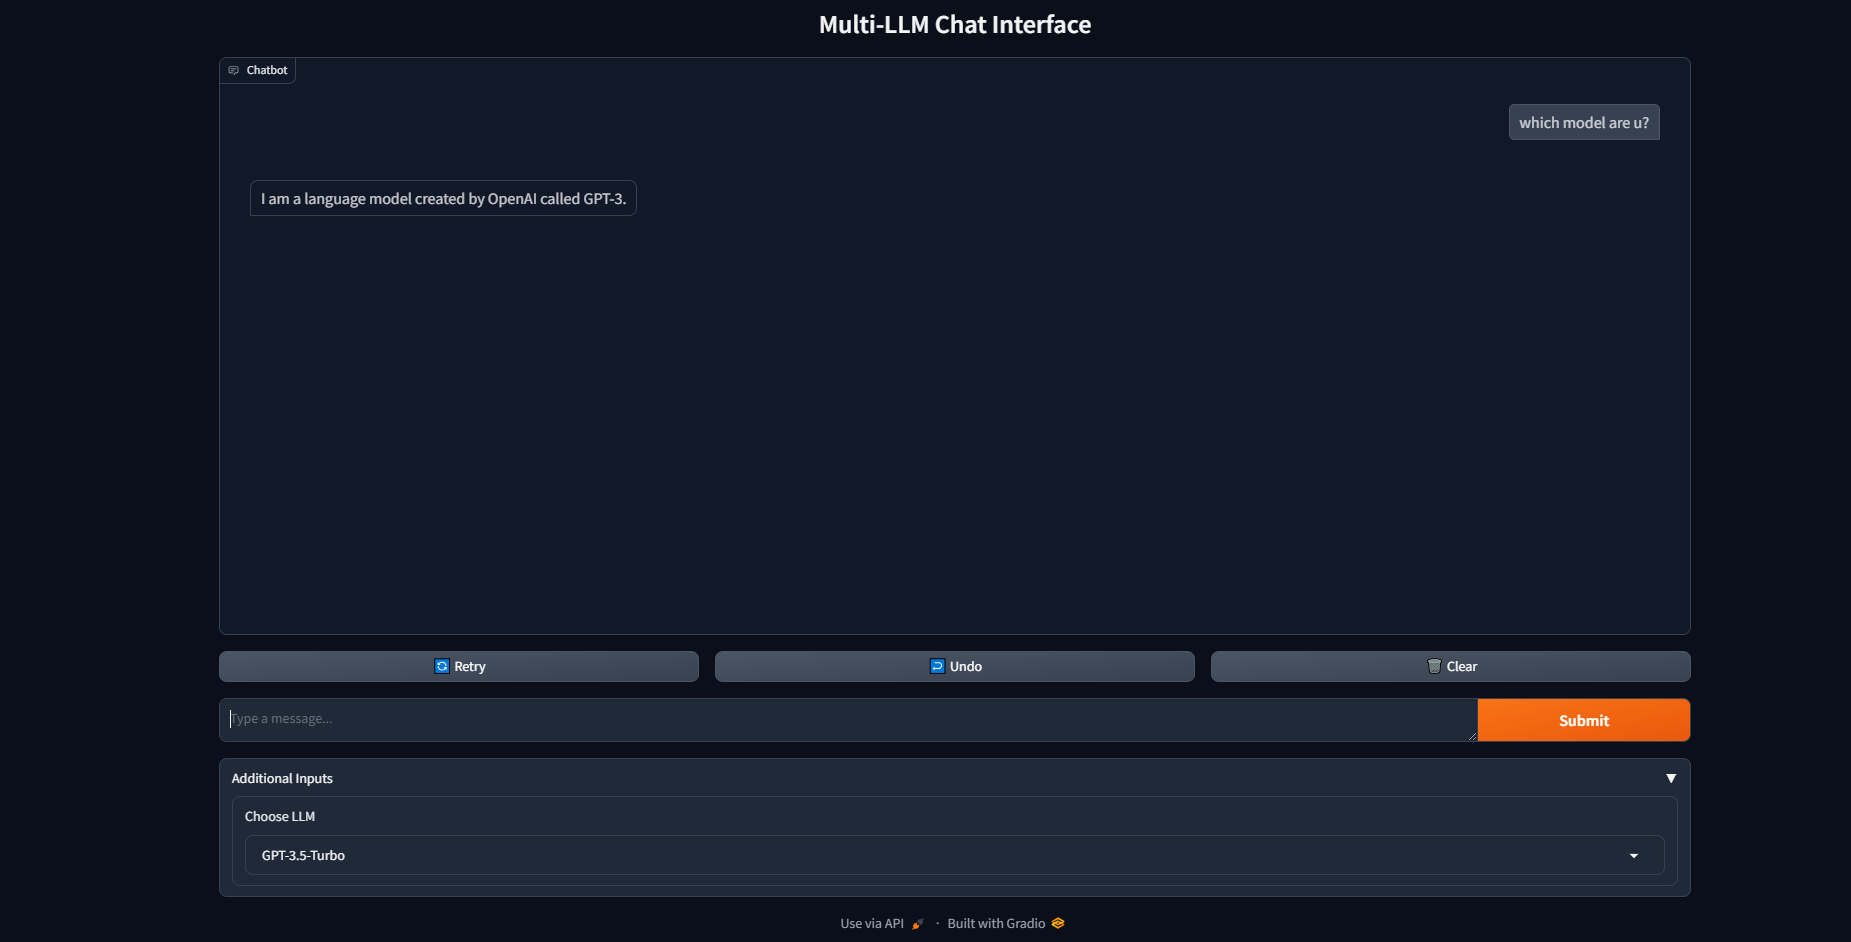

In [ ]:
!pip install openai anthropic google-generativeai gradio



from openai import OpenAI
import anthropic
import google.generativeai as genai
import gradio as gr

# Initialize API clients
openai_client = OpenAI(api_key="sk-...")  # Replace with your OpenAI API key
anthropic_client = anthropic.Anthropic(api_key="sk-ant-...")  # Replace with your Anthropic API key
genai.configure(api_key="YOUR_GOOGLE_API_KEY")  # Replace with your Google API key

def predict(message, history, model_choice):
    history_format = []
    for human, assistant in history:
        history_format.append({"role": "user", "content": human})
        history_format.append({"role": "assistant", "content": assistant})
    history_format.append({"role": "user", "content": message})

    if model_choice == "GPT-3.5-Turbo":
        response = openai_client.chat.completions.create(
            model='gpt-3.5-turbo',
            messages=history_format,
            temperature=1.0,
            stream=True
        )
        partial_message = ""
        for chunk in response:
            if chunk.choices[0].delta.content is not None:
                partial_message += chunk.choices[0].delta.content
                yield partial_message

    elif model_choice == "Claude":
        response = anthropic_client.completions.create(
            model="claude-2",
            prompt=f"{anthropic.HUMAN_PROMPT} {message} {anthropic.AI_PROMPT}",
            max_tokens_to_sample=1000,
            stream=True
        )
        partial_message = ""
        for chunk in response:
            partial_message += chunk.completion
            yield partial_message

    elif model_choice == "Gemini":
        model = genai.GenerativeModel('gemini-pro')
        response = model.generate_content(message, stream=True)
        partial_message = ""
        for chunk in response:
            partial_message += chunk.text
            yield partial_message

def launch_interface():
    model_choices = ["GPT-3.5-Turbo", "Claude", "Gemini"]

    gr.ChatInterface(
        predict,
        additional_inputs=[
            gr.Dropdown(choices=model_choices, label="Choose LLM", value="GPT-3.5-Turbo")
        ],
        title="Multi-LLM Chat Interface"
    ).launch()

if __name__ == "__main__":
    launch_interface()